In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import *
from keras.layers import BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset_path = '/content/drive/MyDrive/datasets/emotion_detection/fer2013.csv'
raw_df = pd.read_csv(dataset_path)

In [5]:
num_classes = 7

In [6]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y) #NORMALIZE
    return X, Y

In [8]:
X, Y = getData(dataset_path)
num_class = len(set(Y))
print(num_class)

7


In [9]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [11]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

32298 train samples
3589 test samples


In [12]:
X_train.shape

(32298, 48, 48, 1)

In [22]:
model = Sequential()
input_shape = (48,48,1)

#CNN 1
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


#CNN 2
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#CNN 3
model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Full Connected 
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

In [24]:
epochs = 6

In [25]:
modelPath='/content/drive/MyDrive/datasets/emotion_detection/Models/Face_Expression_Classfication_4Conv_model.h5' # save model at this location after each epoch
history=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=epochs, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[ModelCheckpoint(filepath=modelPath)])

Epoch 1/6
505/505 [==============================] - 27s 45ms/step - loss: 1.7133 - accuracy: 0.3309 - val_loss: 1.4940 - val_accuracy: 0.4193
Epoch 2/6
505/505 [==============================] - 21s 42ms/step - loss: 1.3326 - accuracy: 0.4874 - val_loss: 1.3553 - val_accuracy: 0.4728
Epoch 3/6
505/505 [==============================] - 22s 43ms/step - loss: 1.1377 - accuracy: 0.5676 - val_loss: 1.2713 - val_accuracy: 0.5263
Epoch 4/6
505/505 [==============================] - 22s 43ms/step - loss: 1.0107 - accuracy: 0.6209 - val_loss: 1.0906 - val_accuracy: 0.5946
Epoch 5/6
505/505 [==============================] - 21s 42ms/step - loss: 0.8824 - accuracy: 0.6706 - val_loss: 1.0930 - val_accuracy: 0.5809
Epoch 6/6
505/505 [==============================] - 21s 42ms/step - loss: 0.7295 - accuracy: 0.7316 - val_loss: 1.1051 - val_accuracy: 0.6032


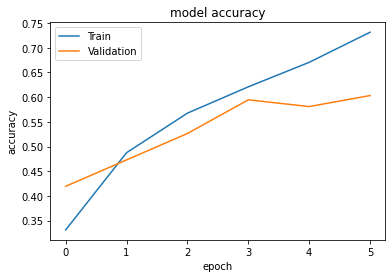

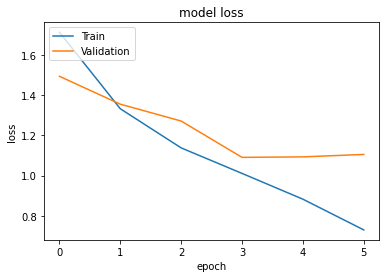

In [26]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
model.save('/content/drive/MyDrive/datasets/emotion_detection/Models/Face_Expression_Classfication_4Conv_backup_model.h5')

In [28]:
loaded_model=keras.models.load_model("/content/drive/MyDrive/datasets/emotion_detection/Models/Face_Expression_Classfication_4Conv_backup_model.h5")

In [29]:
datagen_validation = ImageDataGenerator(rescale = 1./255)
validation_data = datagen_validation.flow_from_directory("/content/drive/MyDrive/datasets/emotion_detection/test/",
                                                    target_size=(48, 48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 7178 images belonging to 7 classes.


In [ ]:
CNN_Predictions = loaded_model.predict(validation_data)
# Choosing highest probalbilty class in every prediction 
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

In [ ]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(validation_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix Model 3', fontsize=20, fontweight='bold')